# iteration 2

# Android App Recommendation Analysis

This notebook presents a comprehensive analysis aimed at identifying Android apps that provide a unique and enjoyable user experience, based on data-driven insights. We use two datasets: `googleplaystore.csv` for app details and `googleplaystore_user_reviews.csv` for user sentiment towards these apps.

## Objectives:
- **Popularity**: Identify apps with a significant number of installs that indicate user approval.
- **Usability**: Focus on apps with high user ratings.
- **Novelty**: Highlight newer or less universally known apps.
- **Unique Strengths**: Extract and discuss unique app features from user reviews.

## Data Loading

We load two key datasets using Pandas, a versatile and powerful data manipulation library for Python.

### Datasets:
- `googleplaystore.csv`: Contains data on apps including categories, ratings, and number of installs.
- `googleplaystore_user_reviews.csv`: Includes user reviews and sentiment analysis results for the apps.

In [24]:
import pandas as pd

# Load the datasets
apps_df = pd.read_csv('../data/googleplaystore.csv')
reviews_df = pd.read_csv('../data/googleplaystore_user_reviews.csv')

## Data Exploration and Cleaning

Here we explore the data to understand its structure, check for missing values, and make necessary adjustments to prepare the data for analysis.

### Exploratory Analysis
- We look at distributions of ratings, installs, and review sentiments.


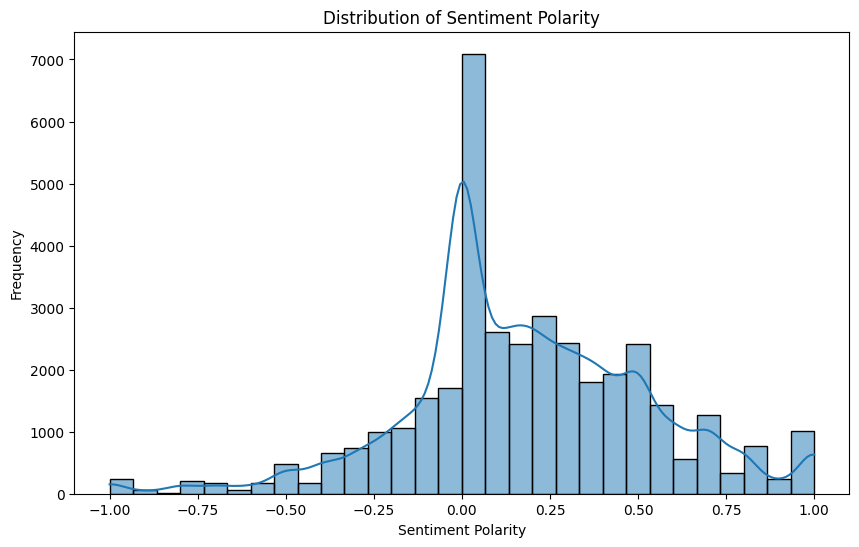

/tmp/ipykernel_2704/83336234.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=reviews_df, palette='viridis')


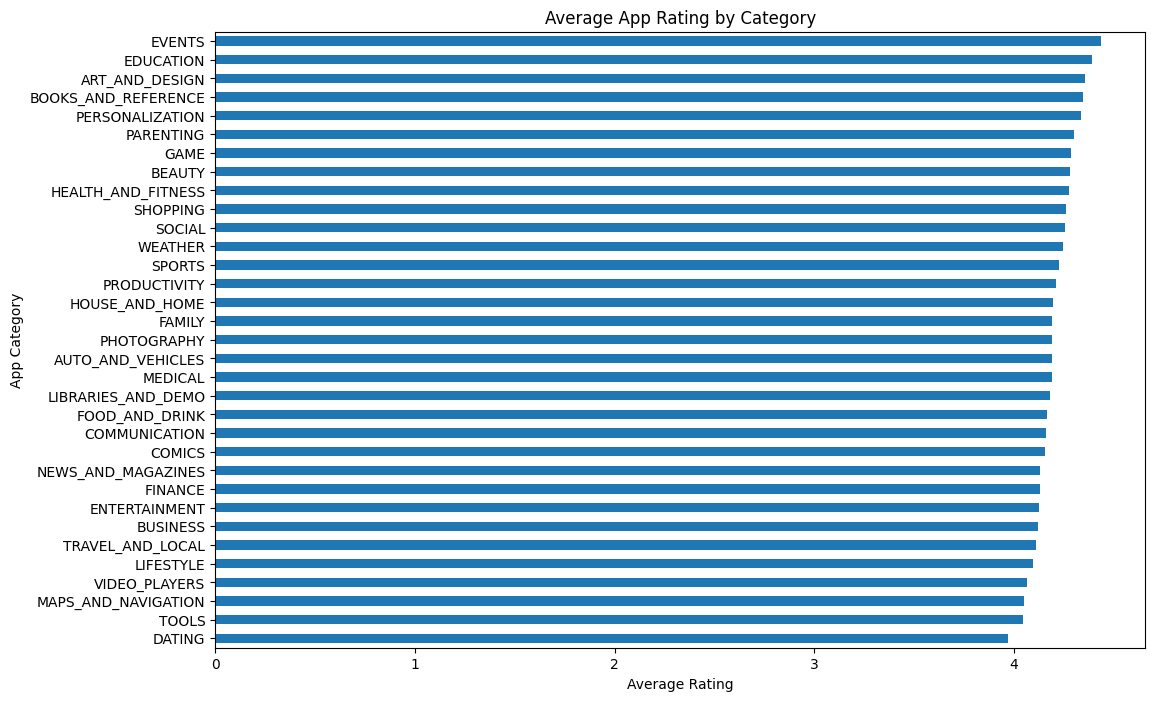

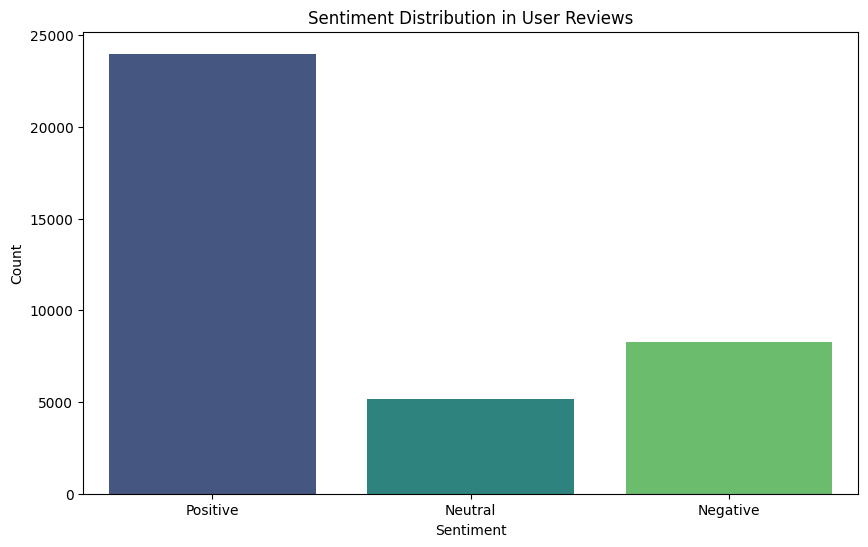

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment polarity distribution
plt.figure(figsize=(10, 6))
sns.histplot(reviews_df['Sentiment_Polarity'], bins=30, kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Average ratings per category
category_ratings = apps_df.groupby('Category')['Rating'].mean().sort_values()
plt.figure(figsize=(12, 8))
category_ratings.plot(kind='barh')
plt.title('Average App Rating by Category')
plt.xlabel('Average Rating')
plt.ylabel('App Category')

# Sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=reviews_df, palette='viridis')
plt.title('Sentiment Distribution in User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


## Analysis

### Popularity Analysis
We calculate a `Popularity Score` based on installs and ratings to gauge the general acceptance and satisfaction with the apps.

### Novelty
We focus on apps updated within the last year to ensure we recommend fresh tools that keep up with current trends.

### Sentiment Analysis
Using sentiment data from user reviews, we identify what makes each app stand out.



In [26]:
import numpy as np

apps_df['Installs'] = apps_df['Installs'].astype(str).str.replace(r'[+,]', '', regex=True).astype(int)

# Sort apps by install base to see the most downloaded apps
top_apps_by_install = apps_df.sort_values(by='Installs', ascending=False)

# Look at the top 1% of apps by installs to determine extremely popular apps
top_1_percent_threshold = top_apps_by_install['Installs'].quantile(0.99)
top_1_percent_apps = top_apps_by_install[top_apps_by_install['Installs'] >= top_1_percent_threshold]

apps_df = apps_df[~apps_df['App'].isin(top_1_percent_apps)]

# Convert 'Installs' to numeric after removing '+' and ','
apps_df['Installs'] = apps_df['Installs'].astype(str).str.replace(r'[+,]', '', regex=True).astype(int)

# Compute a popularity score perhaps as a combination of installs and rating
apps_df['Popularity_Score'] = apps_df['Rating'] * np.log1p(apps_df['Installs'])

# You may need to have a 'Last Updated' column in datetime format to do this
apps_df['Last_Updated'] = pd.to_datetime(apps_df['Last Updated'])
recent_apps = apps_df[apps_df['Last_Updated'] >= '2018-06-01']


# Merge datasets on the 'App' column, including the translated reviews
combined_df = pd.merge(apps_df, reviews_df, on='App', how='inner')

# Cleanup by dropping rows with missing values and duplicates
combined_df.dropna(subset=['Rating', 'Sentiment_Polarity', 'Sentiment', 'Translated_Review'], inplace=True)
combined_df.drop_duplicates(inplace=True)

# Calculating average sentiments while keeping the review text
avg_sentiments = combined_df.groupby('App').agg({
    'Rating': 'mean',  # We can also compute the average rating here if it's relevant
    'Sentiment_Polarity': 'mean',
    'Sentiment_Subjectivity': 'mean'
}).reset_index()

# Merge the average sentiments back to the apps DataFrame
apps_enriched_df = pd.merge(apps_df.drop(['Rating'], axis=1), avg_sentiments, on='App', how='left')

# sample_reviews['Translated_Review'] = sample_reviews['Translated_Review'].apply(lambda x: ' '.join(x))
# apps_enriched_df = pd.merge(apps_enriched_df, sample_reviews, on='App', how='left')
apps_enriched_df.drop_duplicates(inplace=True)


In [35]:
combined_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Popularity_Score,Last_Updated,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,51.177225,2018-01-15,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,51.177225,2018-01-15,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,51.177225,2018-01-15,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,51.177225,2018-01-15,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,51.177225,2018-01-15,I hate,Negative,-0.800,0.900000


In [37]:
from textblob import TextBlob

# Function to find unique features in reviews
def extract_features(reviews):
    features = []
    for review in reviews:
        blob = TextBlob(review)
        features.extend([np for np in blob.noun_phrases if blob.sentiment.polarity > 0.1])
    return list(set(features))

# Convert 'Translated_Review' column to string type
reviews_df['Translated_Review'] = reviews_df['Translated_Review'].astype(str)

# Group reviews by app and extract features
grouped_reviews = reviews_df.groupby('App')['Translated_Review'].apply(list)
unique_features = grouped_reviews.apply(extract_features)

In [45]:
apps_enriched_w_unique_features_df = pd.merge(apps_enriched_df, unique_features, on='App', how='left')

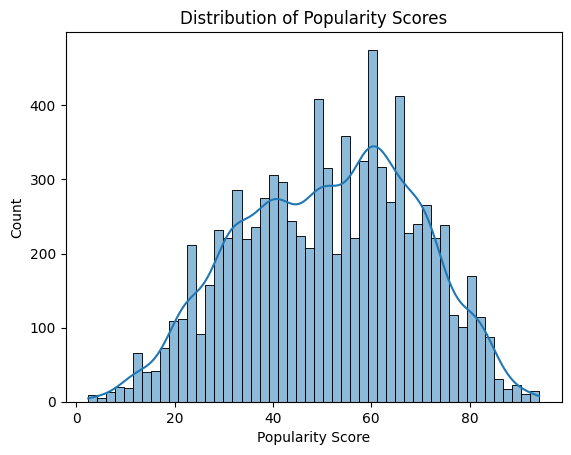

Suggested lower threshold: 64.78478441567309
Suggested upper threshold: 79.77390112526588


In [40]:
# Visualize the distribution of the Popularity Score
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(apps_enriched_w_unique_features_df['Popularity_Score'], bins=50, kde=True)
plt.xlabel('Popularity Score')
plt.title('Distribution of Popularity Scores')
plt.show()

# Determine the 75th and 95th percentiles
lower_threshold = apps_enriched_w_unique_features_df['Popularity_Score'].quantile(0.75)
upper_threshold = apps_enriched_w_unique_features_df['Popularity_Score'].quantile(0.95)

# You might decide on a threshold within this range
print(f"Suggested lower threshold: {lower_threshold}")
print(f"Suggested upper threshold: {upper_threshold}")

## Recommendations


In [42]:
recommended_apps = apps_enriched_w_unique_features_df[
    (apps_enriched_w_unique_features_df['Rating'] >= 4.5) &
    (apps_enriched_w_unique_features_df['Sentiment_Polarity'] > 0.3) &
    (apps_enriched_w_unique_features_df['Popularity_Score'] > lower_threshold) &
    (apps_enriched_w_unique_features_df['Last_Updated'] >= '2018-06-01')
].head(5)

In [43]:
recommended_apps

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Popularity_Score,Last_Updated,Rating,Sentiment_Polarity,Sentiment_Subjectivity,Translated_Review
231,Fast Scanner : Free PDF Scan,BUSINESS,103755,14M,10000000,Free,0,Everyone,Business,"July 11, 2018",3.9.2,4.1 and up,72.531431,2018-07-11,4.5,0.310898,0.423539,"[pictures papers, thanks, convenient scan, coo..."
1087,BeyondMenu Food Delivery,FOOD_AND_DRINK,51517,Varies with device,1000000,Free,0,Everyone,Food & Drink,"August 1, 2018",Varies with device,Varies with device,64.932904,2018-08-01,4.7,0.408743,0.617680,"[descriptions restaurant, easy order, big thin..."
1099,Home Workout - No Equipment,HEALTH_AND_FITNESS,428156,15M,10000000,Free,0,Everyone,Health & Fitness,"June 28, 2018",Varies with device,Varies with device,77.366860,2018-06-28,4.8,0.338352,0.555221,"[brilliant night, great thing need, legs day, ..."
1110,30 Day Fitness Challenge - Workout at Home,HEALTH_AND_FITNESS,471036,Varies with device,10000000,Free,0,Everyone,Health & Fitness,"August 3, 2018",Varies with device,4.0 and up,77.366860,2018-08-03,4.8,0.333537,0.558588,"[thanks, exercises days remind, day challenge ..."
1111,Home Workout for Men - Bodybuilding,HEALTH_AND_FITNESS,12705,15M,1000000,Free,0,Everyone,Health & Fitness,"July 10, 2018",1.0.2,4.0 and up,66.314455,2018-07-10,4.8,0.504387,0.476908,"[days atleast 3day 1weeks, healthy shape, resu..."


In [44]:
recommended_apps.to_csv('../data/recommended_apps.csv', index=False)


We have analyzed various Android apps and based on their ratings, user reviews, and unique features, we recommend the following five apps. These recommendations are aimed at enhancing your daily life through innovative solutions and user-praised functionality.

### 1. **Fast Scanner : Free PDF Scan** - _Business_
- **Popularity Score**: 72.53
- **Rating**: 4.5
- **Unique Feature**: Fast Scanner turns your device into a powerful digital office with features like PDF scanning and cloud storage support. Users appreciate its simple use and the capability to quickly digitalize documents, despite the presence of ads. It is especially praised for its business utility and fast processing.

### 2. **BeyondMenu Food Delivery** - _Food & Drink_
- **Popularity Score**: 64.93
- **Rating**: 4.7
- **Unique Feature**: BeyondMenu offers a convenient way to order food and apply coupons with ease. Users highlight its straightforward ordering process and quick reaction time, making it a favorite for fast and hassle-free food delivery.

### 3. **Home Workout - No Equipment** - _Health & Fitness_
- **Popularity Score**: 77.37
- **Rating**: 4.8
- **Unique Feature**: This app provides comprehensive fitness routines tailored for those without equipment. It is lauded for diverse workouts that fit various fitness levels and goals, from beginners to more advanced routines. Users find it exceptionally good for maintaining fitness with minimal setup.

### 4. **30 Day Fitness Challenge - Workout at Home** - _Health & Fitness_
- **Popularity Score**: 77.37
- **Rating**: 4.8
- **Unique Feature**: Structured around a 30-day challenge, this app helps you build a daily workout habit. It offers varied exercises each day to keep your routine engaging and effective. Users enjoy the app's structure that progressively increases workout intensity, suitable for all fitness levels.

### 5. **Home Workout for Men - Bodybuilding** - _Health & Fitness_
- **Popularity Score**: 66.31
- **Rating**: 4.8
- **Unique Feature**: Tailored specifically for men's fitness goals, this app focuses on bodybuilding workouts that can be done from home. It's appreciated for its detailed exercises and animations that guide through proper techniques, making it highly effective for home-based workouts.

Each of these apps not only meets high standards of usability and popularity but also offers unique features that address specific needs, making them stand out in their respective categories. Whether you are looking to streamline your business tasks, enhance your fitness routine, or enjoy a better dining experience at home, these apps come highly recommended.


## Conclusion

This analysis provides a well-rounded view of Android apps that excel in both user satisfaction and unique offerings. The recommended apps are selected based on a combination of data-driven insights and user review analysis, ensuring they are likely to be enjoyed by new users.

Thank you for considering this analysis in your quest for great Android apps!


### Sentiment Analysis Deep Dive (Deprecated)

In [3]:
from textblob import TextBlob

# Function to find unique features in reviews
def extract_features(reviews):
    features = []
    for review in reviews:
        blob = TextBlob(review)
        features.extend([np for np in blob.noun_phrases if blob.sentiment.polarity > 0.1])
    return list(set(features))

# Group reviews by app and extract features
reviews_df['Translated_Review'] = reviews_df['Translated_Review'].fillna('')
grouped_reviews = reviews_df.groupby('App')['Translated_Review'].apply(list)
unique_features = grouped_reviews.apply(extract_features)

In [4]:
grouped_reviews.head()

App
10 Best Foods for You               [I like eat delicious food. That's I'm cooking...
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室    [Great, nice, Almost mobile phone, Very effect...
11st                                [Horrible ID verification, Easy even basic Kor...
1800 Contacts - Lens Store          [Great hassle free way order contacts. Got cal...
1LINE – One Line with One Touch     [gets 1* there's ad every single level restart...
Name: Translated_Review, dtype: object

In [ ]:
unique_features.head()

App
10 Best Foods for You               [foods 4u, luv apps, diabetes age, absolutely ...
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室    [job internship, ok, available jobs, ui/ux, go...
11st                                [product information, source control, e-mail ....
1800 Contacts - Lens Store          [additional ads, happy, reliable shipping, ste...
1LINE – One Line with One Touch     [enjoy, way, fun, not, unskippable ads, wow, r...
Name: Translated_Review, dtype: object

In [70]:
from textblob import TextBlob

# Function to extract phrases indicating strong sentiments
def extract_phrases(text):
    blob = TextBlob(' '.join(text))  # Convert list of sentences to a single string
    return [sentence for sentence in blob.sentences if sentence.sentiment.polarity > 0.5 or sentence.sentiment.polarity < -0.5]

# Apply the function to extract phrases from reviews
apps_enriched_df['Key_Phrases'] = apps_enriched_df['Translated_Review'].apply(extract_phrases)
# Remove non-numeric characters from 'Installs' column
apps_enriched_df['Installs'] = apps_enriched_df['Installs'].astype(str).str.replace('[+,]', '', regex=True).astype(float)


In [71]:
apps_enriched_df[apps_enriched_df['App'] == '10 Best Foods for You']

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating,Sentiment_Polarity,Sentiment_Subjectivity,Translated_Review,Key_Phrases
1393,10 Best Foods for You,HEALTH_AND_FITNESS,2490,3.8M,500000.0,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,4.0,0.465906,0.493254,[I like eat delicious food. That's I'm cooking...,"[(I, , l, i, k, e, , e, a, t, , d, e, l, i,..."
1407,10 Best Foods for You,HEALTH_AND_FITNESS,2490,3.8M,500000.0,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,4.0,0.465906,0.493254,[I like eat delicious food. That's I'm cooking...,"[(I, , l, i, k, e, , e, a, t, , d, e, l, i,..."


Text(0.5, 1.0, 'Correlation Matrix of App Features')

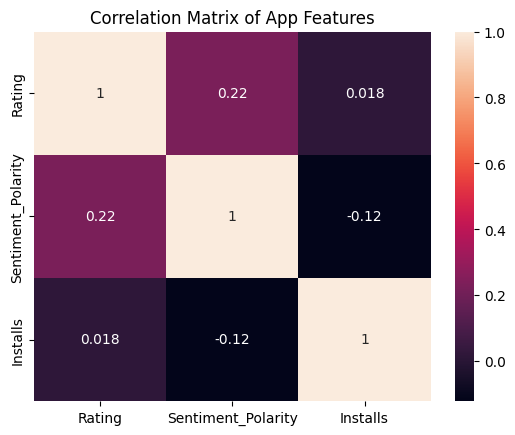

In [72]:
# Calculate the correlation matrix
correlation_matrix = apps_enriched_df[['Rating', 'Sentiment_Polarity', 'Installs']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of App Features')


In [59]:
# Identify top-rated apps with positive sentiment
recommended_apps = apps_enriched_df[(apps_enriched_df['Rating'] >= 4.5) & 
                                    (apps_enriched_df['Sentiment_Polarity'] > 0.3)]
recommended_apps = recommended_apps[['App', 'Category', 'Rating', 'Sentiment_Polarity']]


In [60]:
recommended_apps

,App,Category,Rating,Sentiment_Polarity
32,Anime Manga Coloring Book,ART_AND_DESIGN,4.5,0.360991
63,Free VIN Report for Used Cars,AUTO_AND_VEHICLES,4.6,0.308575
88,AutoScout24 Switzerland – Find your new car,AUTO_AND_VEHICLES,4.6,0.413545
92,Fuelio: Gas log & costs,AUTO_AND_VEHICLES,4.6,0.434438
104,Hairstyles step by step,BEAUTY,4.6,0.489025
...,...,...,...,...
6587,Blood Pressure Log - MyDiary,MEDICAL,4.7,0.325055
7055,BZWBK24 mobile,FINANCE,4.5,0.326883
7939,Curriculum vitae App CV Builder Free Resume Maker,BUSINESS,4.5,0.393703
7988,CW Seed,FAMILY,4.5,0.305569
